# Lab03 Pandas 
## Stephen Blackwell
### 2/18/20

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial.distance import pdist, squareform

## Parts A-C

In [11]:
dmml = pd.read_csv('dmml_survey.csv', sep=',')
dmml.head(6)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
0,"buzzwordy, but needed. I'm excited to learn de...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,7.0,7.0,4.0,4.0,7.0,5.0,7.0,6.0,1.0,1.0,1.0,3.0,5.0
1,I don’t know much about them,"CSC 230 Computer Science II, CSC 301 Database ...",6.0,4.0,4.0,6.0,2.0,4.0,5.0,5.0,6.0,6.0,3.0,3.0,2.0,2.0,6.0
2,These two concepts seem intimately intertwined...,"CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,5.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,6.0,2.0,7.0,4.0
3,"To me, data mining is being able to harvest da...","CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,6.0,6.0,3.0,7.0,7.0,2.0,7.0,6.0,7.0,3.0,1.0,2.0,4.0
4,I believe data mining is looking through code ...,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,6.0,5.0,7.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0
5,I have positive impressions of them,"CSC 111 Data Science and Visualization, CSC 23...",7.0,7.0,7.0,6.0,5.0,7.0,7.0,6.0,7.0,7.0,6.0,5.0,5.0,7.0,7.0


## Part D

In [5]:
dmml.describe()

,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
count,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000
mean,6.50000,6.500000,5.958333,6.458333,4.625000,5.375000,5.958333,5.083333,5.958333,5.250000,5.041667,4.208333,3.75000,4.625000,4.791667
std,0.65938,0.780189,0.954585,0.931533,1.408437,1.377222,0.907896,1.612901,1.197068,1.799758,1.731528,1.977683,2.26984,1.837117,1.444003
min,5.00000,4.000000,4.000000,3.000000,2.000000,3.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,2.000000,2.000000
25%,6.00000,6.000000,5.000000,6.000000,4.000000,4.000000,5.000000,4.000000,5.750000,4.000000,4.000000,3.000000,1.75000,3.000000,4.000000
50%,7.00000,7.000000,6.000000,7.000000,4.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,4.000000,3.50000,5.000000,5.000000
75%,7.00000,7.000000,7.000000,7.000000,6.000000,6.250000,7.000000,6.000000,7.000000,7.000000,6.000000,6.000000,6.00000,6.250000,6.000000
max,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000


On average the largest motivating factor(s) is a tie between Grade and Career, with coding cool stuff as a close third
The smallest motivating factor is social interaction

On average the largets confidence factor(s) is a tie between nested loops and java
The smallest confidence factor is dot product

## Part E

In [6]:
dmml.tail(6)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dmml = dmml.dropna()
dmml.tail(6)

,Impressions,Courses,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
18,I know nothing about machine learning. I think...,"CSC 111 Data Science and Visualization, CSC 23...",7.0,7.0,5.0,7.0,3.0,6.0,7.0,7.0,7.0,6.0,6.0,7.0,7.0,7.0,5.0
19,"Having taken ""data mining"" in the business sch...","CSC 111 Data Science and Visualization, CSC 23...",7.0,7.0,7.0,7.0,7.0,7.0,5.0,2.0,6.0,2.0,7.0,2.0,7.0,5.0,2.0
20,I've had a bit of exposure to machine learning...,"CSC 111 Data Science and Visualization, CSC 23...",7.0,5.0,5.0,5.0,4.0,6.0,5.0,5.0,5.0,2.0,7.0,7.0,7.0,7.0,7.0
21,"Cleaning, transforming, mining data with the a...","CSC 230 Computer Science II, CSC 301 Database ...",7.0,7.0,6.0,6.0,7.0,6.0,6.0,5.0,7.0,5.0,6.0,4.0,7.0,7.0,6.0
22,Sounds cool,"CSC 230 Computer Science II, CSC 242 Organizat...",7.0,7.0,7.0,7.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,6.0,6.0,5.0,6.0
23,"I think data mining is very powerful, and can ...","CSC 111 Data Science and Visualization, CSC 23...",6.0,7.0,6.0,7.0,6.0,6.0,7.0,5.0,7.0,6.0,7.0,7.0,6.0,6.0,5.0


In [13]:
dmml = dmml.drop(['Impressions', 'Courses'], axis=1)
dmml

,Motivation_grade,Motivation_future_career,Motivation_intellectual_challenge,Motivation_code_cool_stuff,Motivation_social_interaction,Motivation_ahead_of_time,Confidence_java,Confidence_python,Confidence_nested_loops,Confidence_pseudocode,Confidence_summations,Confidence_partial_derivatives,Confidence_vector_dot_product,Confidence_linear_regression,Confidence_conditional_probability
0,6.0,7.0,7.0,7.0,4.0,4.0,7.0,5.0,7.0,6.0,1.0,1.0,1.0,3.0,5.0
1,6.0,4.0,4.0,6.0,2.0,4.0,5.0,5.0,6.0,6.0,3.0,3.0,2.0,2.0,6.0
2,6.0,7.0,5.0,6.0,6.0,6.0,5.0,7.0,7.0,7.0,4.0,6.0,2.0,7.0,4.0
3,7.0,7.0,6.0,6.0,3.0,7.0,7.0,2.0,7.0,6.0,7.0,3.0,1.0,2.0,4.0
4,7.0,6.0,5.0,7.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,1.0,2.0,2.0
5,7.0,7.0,7.0,6.0,5.0,7.0,7.0,6.0,7.0,7.0,6.0,5.0,5.0,7.0,7.0
6,7.0,7.0,5.0,6.0,3.0,3.0,6.0,4.0,4.0,4.0,6.0,3.0,4.0,7.0,4.0
7,7.0,7.0,7.0,7.0,7.0,7.0,5.0,7.0,6.0,7.0,5.0,5.0,3.0,6.0,5.0
8,7.0,7.0,6.0,7.0,4.0,6.0,7.0,6.0,6.0,4.0,3.0,3.0,3.0,3.0,3.0
9,6.0,6.0,4.0,3.0,4.0,3.0,5.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,3.0


## Part F

In [16]:
npArray = dmml.values
npArray

array([[6., 7., 7., 7., 4., 4., 7., 5., 7., 6., 1., 1., 1., 3., 5.],
       [6., 4., 4., 6., 2., 4., 5., 5., 6., 6., 3., 3., 2., 2., 6.],
       [6., 7., 5., 6., 6., 6., 5., 7., 7., 7., 4., 6., 2., 7., 4.],
       [7., 7., 6., 6., 3., 7., 7., 2., 7., 6., 7., 3., 1., 2., 4.],
       [7., 6., 5., 7., 4., 5., 4., 3., 4., 3., 4., 4., 1., 2., 2.],
       [7., 7., 7., 6., 5., 7., 7., 6., 7., 7., 6., 5., 5., 7., 7.],
       [7., 7., 5., 6., 3., 3., 6., 4., 4., 4., 6., 3., 4., 7., 4.],
       [7., 7., 7., 7., 7., 7., 5., 7., 6., 7., 5., 5., 3., 6., 5.],
       [7., 7., 6., 7., 4., 6., 7., 6., 6., 4., 3., 3., 3., 3., 3.],
       [6., 6., 4., 3., 4., 3., 5., 2., 3., 1., 1., 1., 1., 2., 3.],
       [6., 6., 6., 7., 5., 4., 6., 6., 6., 6., 6., 6., 5., 4., 3.],
       [5., 6., 7., 6., 6., 3., 6., 7., 7., 4., 4., 6., 6., 5., 6.],
       [6., 7., 7., 7., 6., 7., 6., 4., 6., 5., 5., 3., 1., 5., 5.],
       [7., 7., 7., 7., 4., 6., 6., 6., 7., 7., 5., 4., 4., 4., 6.],
       [7., 7., 6., 7., 4., 5., 7.

## Part G

In [17]:
npArray.shape

(24, 15)

## Part H

In [23]:
distArrayToFormat = pdist(npArray, metric='euclidean')
distArray = squareform(distArrayToFormat)
distArray.shape

(24, 24)

## Part I

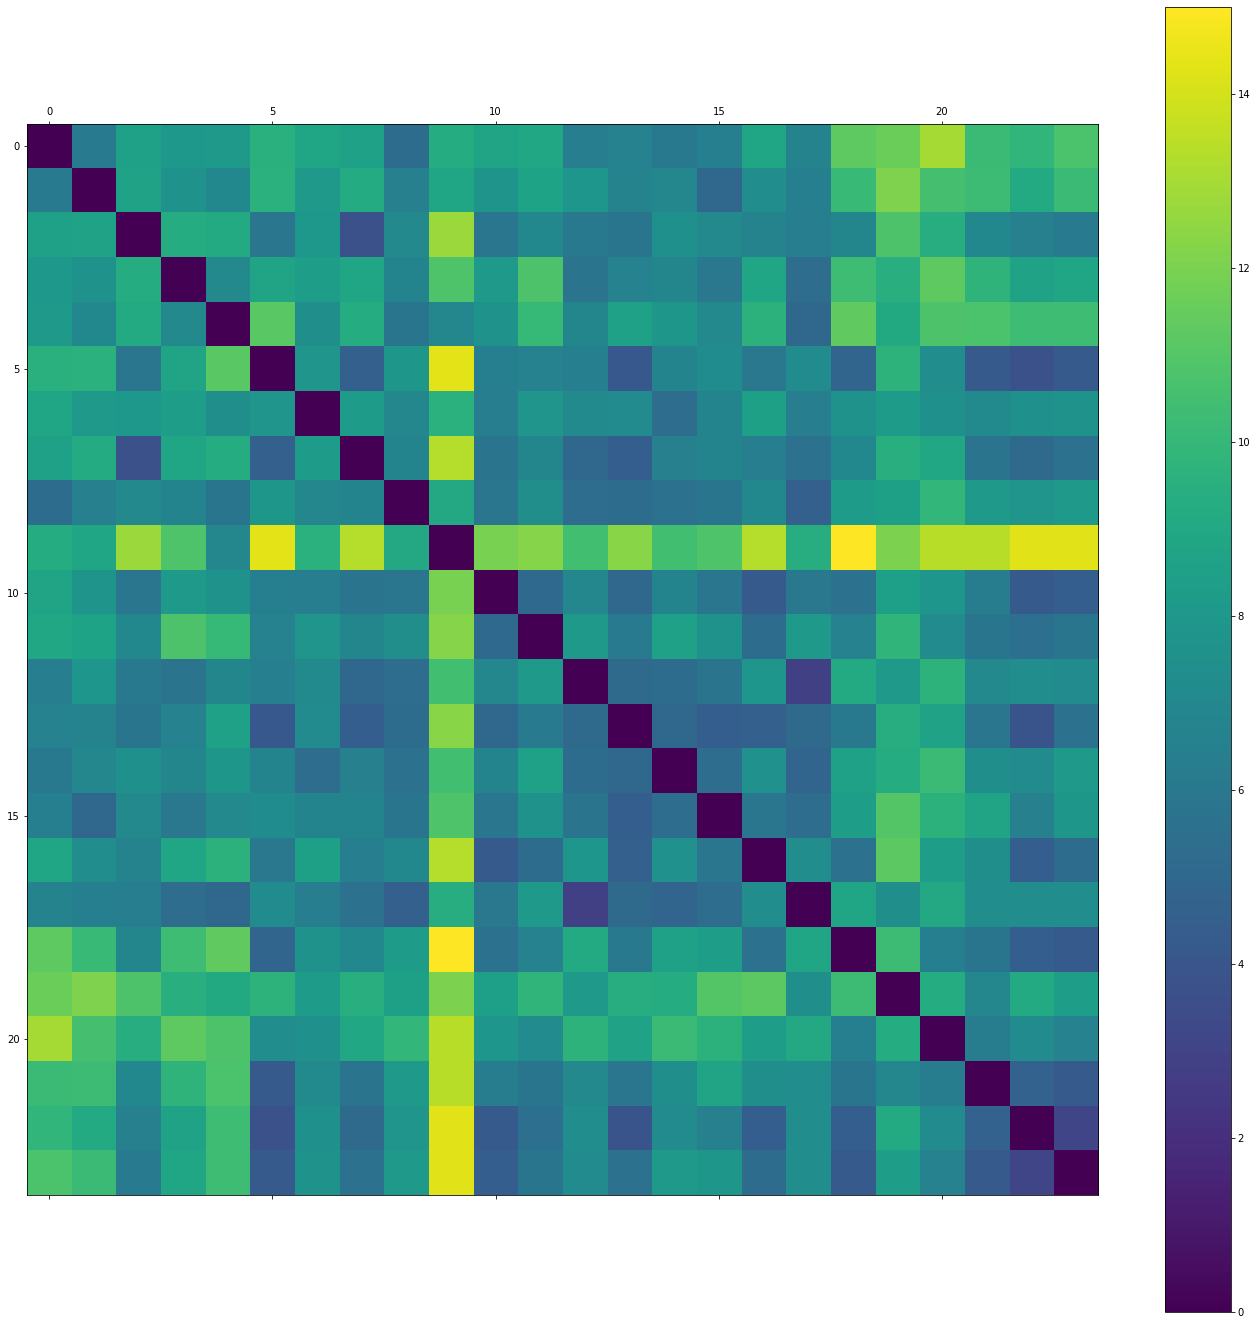

In [37]:
fig = plt.figure(figsize = (24,24))
ax = fig.add_subplot(111)
cax = ax.matshow(distArray)
fig.colorbar(cax)


plt.show()

The main diagonal is purple becuase they represent an objects distance from itself. Because the row and column labels are identical, down the middle a row label meets it matching column label, and obviously the distance between two of the same thing is 0, hence the purple line. Purple represents 0 distance.
The clearly defined row/col 9 indicates that, with a bright yellow color, that value 9 has a high distance from all other values

## Challenge 1

In [92]:
np.unravel_index(distArray.argmax(), distArray.shape)

(9, 18)

The two most distant surveys were survey 9 and survey 18

## Challenge 2

In [91]:
minDistance = distArrayToFormat[np.nonzero(distArrayToFormat)].min()
result = np.where(distArray == minDistance)
result

(array([12, 17]), array([17, 12]))

The two most similar surveys were survey 12 and survey 17

## Challenge 3

In [120]:
pairs = []
rows = dmml.shape[0]
surveys = list(range(0, rows))
while len(surveys) > 1:
    surveyBase = surveys.pop(0)
    bestPair = surveys[0]
    minVal = distArray[surveyBase, bestPair];
    for i in range(1, len(surveys)):
        surveyTest = surveys[i]
        dist = distArray[surveyBase, surveyTest]
        if dist < minVal:
            bestPair = surveyTest
            minVal = dist
    surveys.remove(bestPair)
    pairs.append([surveyBase, bestPair])

if len(surveys) == 1:
    surveyBase = surveys[0]
    minVal = distArray[surveyBase, pairs[0][0]] + distArray[surveyBase, pairs[0][1]]
    bestPair = 0
    for i in range(1,len(pairs)):
        totalDistance = distArray[surveyBase, pairs[i][0]] + distArray[surveyBase, pairs[i][1]]
        if totalDistance < minVal:
            bestPair = i
            minVal = totalDistance
    pairs[bestPair].append(surveyBase)

pairs

[[0, 8],
 [1, 15],
 [2, 7],
 [3, 17],
 [4, 12],
 [5, 22],
 [6, 14],
 [9, 10],
 [11, 16],
 [13, 23],
 [18, 21],
 [19, 20]]

This code first sorts the entire group into as many pairs as possible, if there is an odd numbered group one person is left out. The algorithm first makes a list of every survey. Then it takes the first survey in the list and finds the best possible match for it. It then removes both of these items from the list of surveys, and adds them to the pairs list as a pair. It continues to take the first item in the list and match it with its best pair until as many pairs as possible have been made.

Then, if there is an individual who has not been paired, the code looks to add him to the best possible group. The code iterates through every pair, computes the distances between the remaining survey and the two in the pair, and then sums those two distances. The group whos summed distance to the remaining survey is the smallest becomes a group of three, with the remaining survey added to them.